In [7]:
import torch
import torchcde

# Create some data
batch, length, input_channels = 1, 10, 2
hidden_channels = 3
t = torch.linspace(0, 1, length)
t_ = t.unsqueeze(0).unsqueeze(-1).expand(batch, length, 1)
x_ = torch.rand(batch, length, input_channels - 1)
x = torch.cat([t_, x_], dim=2)  # include time as a channel

# Interpolate it
coeffs = torchcde.hermite_cubic_coefficients_with_backward_differences(x)
X = torchcde.CubicSpline(coeffs)

# Create the Neural CDE system
class F(torch.nn.Module):
    def __init__(self):
        super(F, self).__init__()
        self.linear = torch.nn.Linear(hidden_channels,
                                      hidden_channels * input_channels)

    def forward(self, t, z):
        return self.linear(z).view(batch, hidden_channels, input_channels)

func = F()
z0 = torch.rand(batch, hidden_channels)

In [2]:
import numpy as np
from matplotlib import pyplot as plt

fitted_params = np.load('./T1_mapping/LS_results/MAVI102_20151026_pre1.mat.npy')
fitted_params = fitted_params.reshape(-1, 3)

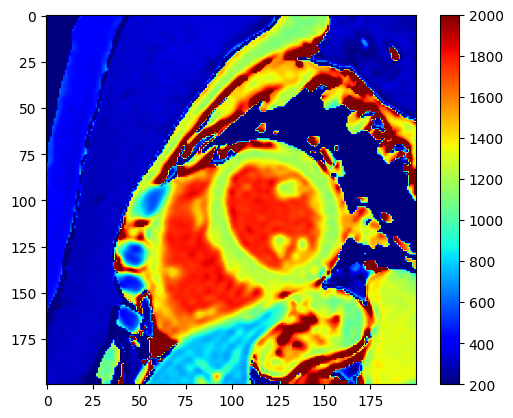

In [12]:
plt.imshow(fitted_params[:, 2].reshape(200, 200), cmap='jet',vmin=200, vmax=2e3)
plt.colorbar()